In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
# Read the data from the CSV file
data = pd.read_csv("/home/Twitter_Data.csv")
# Clean the data (remove irrelevant characters, etc.)
# Add your data cleaning steps here
# Define a function to calculate sentiment
def get_sentiment(text):
  """
  This function takes a text string as input and returns its sentiment (positive, negative, or neutral)
  """
  blob = TextBlob(text)
  sentiment = blob.sentiment
  if sentiment.polarity > 0:
    return "positive"
  elif sentiment.polarity < 0:
    return "negative"
  else:
    return "neutral"

# Check the column names of the DataFrame
print(data.columns)
# Assuming the last column contains text data, and it's the fourth column (index 3)
data["text"] = data.iloc[:, 0]
# Replace NaN values in the 'text' column with an empty string
data['text'] = data['text'].fillna('')
# Now, apply sentiment analysis
data["sentiment"] = data["text"].apply(get_sentiment)
# Now you can proceed with your sentiment analysis code
# Add a new column to the DataFrame containing the sentiment of each tweet
data["sentiment"] = data["text"].apply(get_sentiment)

# Analyze sentiment towards specific topics or brands
topic = "modi" # Replace with your topic or brand of interest
positive_tweets = data[(data["sentiment"] == "positive") & (data["text"].str.contains(topic))]
negative_tweets = data[(data["sentiment"] == "negative") & (data["text"].str.contains(topic))]
neutral_tweets = data[(data["sentiment"] == "neutral") & (data["text"].str.contains(topic))]
# Calculate the percentage of positive, negative, and neutral tweets
total_tweets = len(data)
positive_percentage = round((len(positive_tweets) / total_tweets) * 100, 2)
negative_percentage = round((len(negative_tweets) / total_tweets) * 100, 2)
neutral_percentage = round((len(neutral_tweets) / total_tweets) * 100, 2)
print(f"Sentiment towards {topic}:")
print(f"- Positive: {positive_percentage}%")
print(f"- Negative: {negative_percentage}%")
print(f"- Neutral: {neutral_percentage}%")

Index(['clean_text', 'category'], dtype='object')
Sentiment towards modi:
- Positive: 40.6%
- Negative: 20.18%
- Neutral: 30.29%


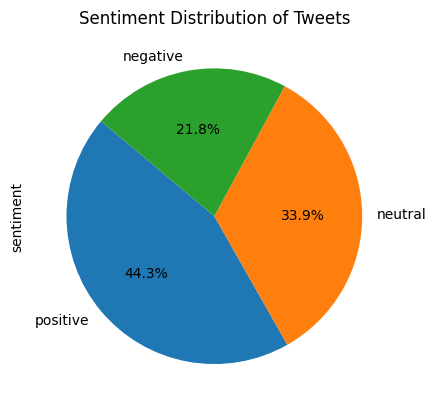

In [ ]:
# Visualize the sentiment distribution
sentiment_counts = data["sentiment"].value_counts()
sentiment_counts.plot(kind="pie", autopct="%1.1f%%", startangle=140)
plt.title("Sentiment Distribution of Tweets")
plt.show()